# 0. Import

https://www.kaggle.com/datasets/yasserh/customer-segmentation-dataset/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import timedelta

warnings.filterwarnings("ignore")
sns.set_palette("husl")
plt.style.use('seaborn-v0_8')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# 1. Exploratory Data Analysis (EDA)

## 1.1. Basic information - size, data types, first/last lines

In [2]:
df = pd.read_excel('../data/Online Retail.xlsx')
print(f"Dataset size: {df.shape[0]}, {df.shape[1]} ")

Dataset size: 541909, 8 


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


## 1.2. General statistics

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [6]:
# Total number of missing values
missing_data = df.isnull().sum()
missing_data

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# Analysing duplicates
duplicates = df.duplicated().sum()
print(f"Found duplicates: {duplicates} ({duplicates / len(df) * 100:.2f}%)")

Found duplicates: 5268 (0.97%)


## 1.3. Analysis of numerical features

In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"{len(numerical_cols)} numerical features found")
print(numerical_cols)

3 numerical features found
['Quantity', 'UnitPrice', 'CustomerID']


In [9]:
# Analysis of negative values (returns)
negative_quantity = df[df['Quantity'] < 0]
negative_price = df[df['UnitPrice'] < 0]

print(f"Records with negative quantity (returns): {len(negative_quantity)} ({len(negative_quantity)/len(df)*100:.2f}%)")
print(f"Records with negative price: {len(negative_price)} ({len(negative_price)/len(df)*100:.2f}%)")

Records with negative quantity (returns): 10624 (1.96%)
Records with negative price: 2 (0.00%)


In [10]:
# CustomerID analysis
print(f"Unique customers: {df['CustomerID'].nunique()}")
print(f"Records without CustomerID: {df['CustomerID'].isnull().sum()} ({df['CustomerID'].isnull().sum()/len(df)*100:.2f}%)")

Unique customers: 4372
Records without CustomerID: 135080 (24.93%)


## 1.4 Analysing categorical features

In [11]:
# Statistics by category
display(df.describe(include='object'))

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


In [12]:
# InvoiceNo analysis
print(f"Unique InvoiceNo: {df['InvoiceNo'].nunique()}")

Unique InvoiceNo: 25900


In [13]:
# Check InvoiceNo's starting with ‘C’ (usually returns)
if df['InvoiceNo'].dtype == 'object':
    c_invoices = df[df['InvoiceNo'].str.startswith('C', na=False)]
    print(f"InvoiceNo beginning with ‘C’ (returns): {len(c_invoices)} ({len(c_invoices)/len(df)*100:.2f}%)")

InvoiceNo beginning with ‘C’ (returns): 9288 (1.71%)


Unique countries: 38


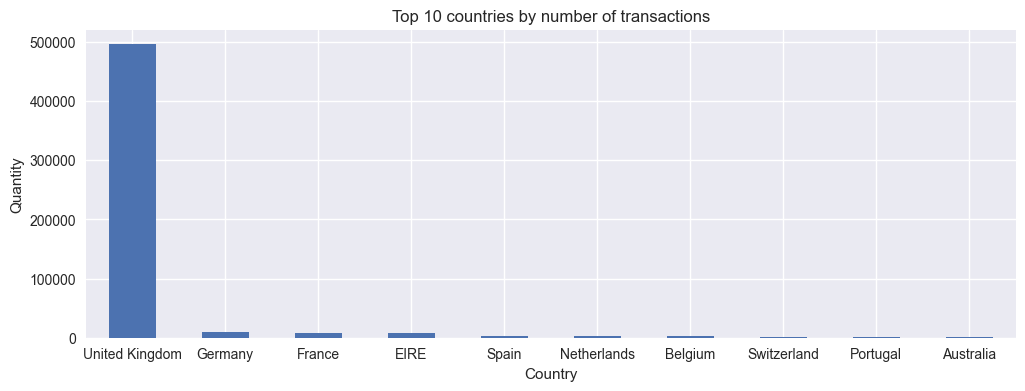

In [14]:
print(f"Unique countries: {df['Country'].nunique()}")

plt.figure(figsize=(12, 4))
df['Country'].value_counts().head(10).plot(kind='bar')

plt.title('Top 10 countries by number of transactions')
plt.ylabel('Quantity')
plt.xticks(rotation=0)
plt.show()

In [15]:
# Time analysis
min_date, max_date = df['InvoiceDate'].min(), df['InvoiceDate'].max()
print(f"Range Date: {min_date.date()} – {max_date.date()} ({(max_date - min_date).days} days)")

Range Date: 2010-12-01 – 2011-12-09 (373 days)


## 1.5 Problems identified

In [16]:
problems = []

# 1. Missing CustomerIDs
missing_customers = df['CustomerID'].isnull().sum()
if missing_customers > 0:
    problems.append(f"{missing_customers} records without CustomerID ({missing_customers/len(df)*100:.1f}%)")

# 2. Duplicates
if duplicates > 0:
    problems.append(f"{duplicates} duplicates ({duplicates/len(df)*100:.2f}%)")

# 3. Negative values
if len(negative_quantity) > 0:
    problems.append(f"{len(negative_quantity)} records with negative quantity")
if len(negative_price) > 0:
    problems.append(f"{len(negative_price)} records with negative price")

# 4. Missing descriptions
missing_desc = df['Description'].isnull().sum()
if missing_desc > 0:
    problems.append(f"{missing_desc} records without product description")

# 5. Zero prices
zero_price = df[df['UnitPrice'] == 0]
if len(zero_price) > 0:
    problems.append(f"{len(zero_price)} records with zero price")

for problem in problems:
    print(problem)

135080 records without CustomerID (24.9%)
5268 duplicates (0.97%)
10624 records with negative quantity
2 records with negative price
1454 records without product description
2515 records with zero price


# 2. Customer Segmentation - Data Cleaning & Preprocessing

## 2.1 Copy

In [16]:
df_original = df.copy()

In [17]:
# Function to display statistics after each step
def show_cleaning_stats(df, step_name):
    print(f"After {step_name}:")
    print(f"Size: {df.shape[0]:,} rows ({df.shape[0]/len(df_original)*100:.2f}% of original)")
    print(f"Unique customers: {df['CustomerID'].nunique()}")

## 2.2 Cleaning up problem data

In [18]:
# Deleting records without CustomerID
before_customerid = len(df)
df = df.dropna(subset=['CustomerID'])
removed_customerid = before_customerid - len(df)

print(f"Deleted {removed_customerid:,} records without CustomerID")
show_cleaning_stats(df, "deleting records without CustomerID")

Deleted 135,080 records without CustomerID
After deleting records without CustomerID:
Size: 406,829 rows (75.07% of original)
Unique customers: 4372


In [19]:
# Deleting duplicates
before_duplicates = len(df)
df = df.drop_duplicates()
removed_duplicates = before_duplicates - len(df)

print(f"{removed_duplicates:,} duplicates removed")
show_cleaning_stats(df, "removing duplicates")

5,225 duplicates removed
After removing duplicates:
Size: 401,604 rows (74.11% of original)
Unique customers: 4372


In [20]:
# remove all returns to simplify the analysis of purchases
before_returns = len(df)
df = df[~df['InvoiceNo'].str.startswith('C', na=False)]
df = df[df['Quantity'] > 0]
removed_returns = before_returns - len(df)

print(f"Deleted {removed_returns:,} records with returns")
show_cleaning_stats(df, "removing the returns")

Deleted 8,872 records with returns
After removing the returns:
Size: 392,732 rows (72.47% of original)
Unique customers: 4339


In [21]:
# Price processing
print(f"Records with zero price: {len(df[df['UnitPrice'] == 0]):,}")
print(f"Records with negative price: {len(df[df['UnitPrice'] < 0]):,}")

print(f"Minimum price: {df['UnitPrice'].min()}")
print(f"Maximum price: {df['UnitPrice'].max()}")
print(f"Median price: {df['UnitPrice'].median()}")

# Delete records with zero or negative prices
before_price = len(df)
df = df[df['UnitPrice'] > 0]
removed_price = before_price - len(df)

print(f"Deleted {removed_price:,} records with incorrect prices")
show_cleaning_stats(df, "processing prices")

Records with zero price: 40
Records with negative price: 0
Minimum price: 0.0
Maximum price: 8142.75
Median price: 1.95
Deleted 40 records with incorrect prices
After processing prices:
Size: 392,692 rows (72.46% of original)
Unique customers: 4338


In [22]:
df['CustomerID'] = df['CustomerID'].astype(int)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France


## 2.3 Checking

In [23]:
print(f"Missing values: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")
print(f"Negative Quantity: {len(df[df['Quantity'] <= 0])}")
print(f"Negative/zero UnitPrice: {len(df[df['UnitPrice'] <= 0])}")
print(f"Unique Customers: {df['CustomerID'].nunique()}")
print(f"Unique Products: {df['StockCode'].nunique()}")
print(f"Data Period: {df['InvoiceDate'].min().date()} - {df['InvoiceDate'].max().date()}")

Missing values: 0
Duplicates: 0
Negative Quantity: 0
Negative/zero UnitPrice: 0
Unique Customers: 4338
Unique Products: 3665
Data Period: 2010-12-01 - 2011-12-09


# 3. Feature engineering

## 3.1 Copy

In [24]:
df_after_cleaning = df.copy()

## 3.2 New features

In [ ]:
# TotalAmount
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
# Time features
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek  # 0 = Monday
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010,12,2


In [26]:
df.shape

(392692, 12)

## 3.3 Preparing data for RFM analysis

RFM analysis is a customer segmentation method based on evaluating their activity across three parameters:
- Recency (how recently a customer made a purchase),
- Frequency (how often they purchase),
- Monetary Value (how much money they have spent in total).

This approach helps identify the most valuable customers and distinguish them from less loyal ones, enabling more efficient marketing strategies and improved sales performance.

______________________

RFM-аналіз — це метод сегментації клієнтів, що базується на оцінці їхньої активності за трьома параметрами:
- Recency (давність останньої покупки),
- Frequency (частота покупок)
- Monetary Value (загальна сума витрачених коштів).

Такий підхід дозволяє визначити, які клієнти є найбільш цінними, а які — менш лояльними. Це допомагає оптимізувати маркетингові зусилля та підвищити ефективність продажів.

In [27]:
# Determine the date of analysis (day after the last transaction)
analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Date of Analysis: {analysis_date.date()}")

Date of Analysis: 2011-12-10


In [28]:
# Create RFM table
rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency  
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

# Rename the columns
rfm_df.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12347,2,7,4310.00
2,12348,75,4,1797.24
3,12349,19,1,1757.55
4,12350,310,1,334.40
...,...,...,...,...
4333,18280,278,1,180.60
4334,18281,181,1,80.82
4335,18282,8,2,178.05
4336,18283,4,16,2045.53


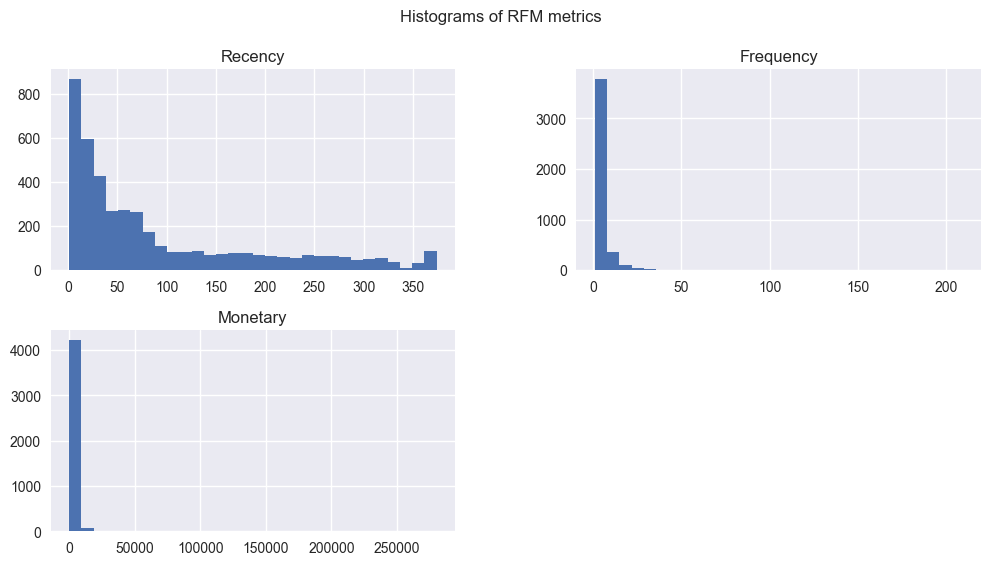

In [29]:
# RFM histograms
rfm_df[['Recency', 'Frequency', 'Monetary']].hist(bins=30, figsize=(12, 6))
plt.suptitle('Histograms of RFM metrics')
plt.show()

In [30]:
rfm_df.describe()

,CustomerID,Recency,Frequency,Monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2048.688081
std,1721.808492,100.014169,7.697998,8985.230220
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,306.482500
50%,15299.500000,51.000000,2.000000,668.570000
75%,16778.750000,142.000000,5.000000,1660.597500
max,18287.000000,374.000000,209.000000,280206.020000


In [31]:
# Additional attributes for segmentation,
customer_features = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',  # Number of orders (Кількість замовлень)
    'StockCode': 'nunique',  # Variety of products (Різноманітність продукції)
    'Quantity': ['sum', 'mean'], # Total and average quantity (Загальна та середня кількість)
    'TotalAmount': ['sum', 'mean', 'std'], # Financial metrics (Фінансові показники)
    'InvoiceDate': ['min', 'max'], # First and last purchase (Перша та остання покупка)
    'Country': lambda x: x.mode().iloc[0]  # Primary country (Основна країна)
}).round(2)

customer_features.columns = [
    'NumOrders', 'NumUniqueProducts', 'TotalQuantity', 'AvgQuantity',
    'TotalSpent', 'AvgOrderValue', 'StdOrderValue', 'FirstPurchase', 'LastPurchase', 'MainCountry'
]

# Add the client's activity period
customer_features['CustomerLifespan'] = (
    customer_features['LastPurchase'] - customer_features['FirstPurchase']
).dt.days
customer_features

,NumOrders,NumUniqueProducts,TotalQuantity,AvgQuantity,TotalSpent,AvgOrderValue,StdOrderValue,FirstPurchase,LastPurchase,MainCountry,CustomerLifespan
CustomerID,,,,,,,,,,,
12346,1,1,74215,74215.00,77183.60,77183.60,NaN,2011-01-18 10:01:00,2011-01-18 10:01:00,United Kingdom,0
12347,7,103,2458,13.51,4310.00,23.68,23.29,2010-12-07 14:57:00,2011-12-07 15:52:00,Iceland,365
12348,4,22,2341,75.52,1797.24,57.98,48.51,2010-12-16 19:09:00,2011-09-25 13:13:00,Finland,282
12349,1,73,631,8.64,1757.55,24.08,34.66,2011-11-21 09:51:00,2011-11-21 09:51:00,Italy,0
12350,1,17,197,11.59,334.40,19.67,7.28,2011-02-02 16:01:00,2011-02-02 16:01:00,Norway,0
...,...,...,...,...,...,...,...,...,...,...,...
18280,1,10,45,4.50,180.60,18.06,3.38,2011-03-07 09:52:00,2011-03-07 09:52:00,United Kingdom,0
18281,1,7,54,7.71,80.82,11.55,6.11,2011-06-12 10:53:00,2011-06-12 10:53:00,United Kingdom,0
18282,2,12,103,8.58,178.05,14.84,5.85,2011-08-05 13:35:00,2011-12-02 11:43:00,United Kingdom,118


In [32]:
# Merge with RFM data
extended_rfm = rfm_df.merge(customer_features.reset_index(), on='CustomerID')
extended_rfm.head()

,CustomerID,Recency,Frequency,Monetary,NumOrders,NumUniqueProducts,TotalQuantity,AvgQuantity,TotalSpent,AvgOrderValue,StdOrderValue,FirstPurchase,LastPurchase,MainCountry,CustomerLifespan
0,12346,326,1,77183.60,1,1,74215,74215.00,77183.60,77183.60,NaN,2011-01-18 10:01:00,2011-01-18 10:01:00,United Kingdom,0
1,12347,2,7,4310.00,7,103,2458,13.51,4310.00,23.68,23.29,2010-12-07 14:57:00,2011-12-07 15:52:00,Iceland,365
2,12348,75,4,1797.24,4,22,2341,75.52,1797.24,57.98,48.51,2010-12-16 19:09:00,2011-09-25 13:13:00,Finland,282
3,12349,19,1,1757.55,1,73,631,8.64,1757.55,24.08,34.66,2011-11-21 09:51:00,2011-11-21 09:51:00,Italy,0
4,12350,310,1,334.40,1,17,197,11.59,334.40,19.67,7.28,2011-02-02 16:01:00,2011-02-02 16:01:00,Norway,0


In [33]:
extended_rfm.shape

(4338, 15)

## 3.4 Saving cleared data

In [34]:
# Save the cleared transaction data
df.to_csv('../data/cleaned_retail_data.csv', index=False)

# Save RFM data
rfm_df.to_csv('../data/rfm_data.csv', index=False)

# Save the extended segmentation data
extended_rfm.to_csv('../data/customer_features.csv', index=False)

In [35]:
print(f"Original records: {len(df_original):,}")
print(f"After cleaning: {len(df):,}")
print(f"Deleted: {len(df_original) - len(df):,} records ({(len(df_original) - len(df))/len(df_original)*100:.1f}%)")
print(f"Unique customers: {df['CustomerID'].nunique():,}")
print(f"Ready for clustering: {extended_rfm.shape[0]:,} customers, {extended_rfm.shape[1] - 1} features")

Original records: 541,909
After cleaning: 392,692
Deleted: 149,217 records (27.5%)
Unique customers: 4,338
Ready for clustering: 4,338 customers, 14 features
